In [1]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
sys.path.insert(1, '../')
import qtm.base_qtm, qtm.constant, qtm.qtm_nqubit, qtm.fubini_study, qtm.encoding
import importlib
import os
importlib.reload(qtm.base_qtm)
importlib.reload(qtm.constant)
importlib.reload(qtm.qtm_1qubit)
importlib.reload(qtm.qtm_nqubit)

<module 'qtm.qtm_nqubit' from '..\\qtm\\qtm_nqubit.py'>

In [2]:
path = "../../experiments/binho_ansatz_15layer/"

In [3]:
dirs = os.listdir(path)

In [4]:
dirs = list(map(int, dirs))
dirs.sort()

C:\Users\haime\AppData\Local\Temp/ipykernel_10756/3403552239.py:11: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fidelities_ghz = fidelities_ghz.applymap(lambda s: np.complex(s.replace('i', 'j'))).values
C:\Users\haime\AppData\Local\Temp/ipykernel_10756/3403552239.py:15: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fid

[0.7546791942826749, 0.7180817465636212, 0.7212972807407151, 0.7382098788458287, 0.7006127288057441]


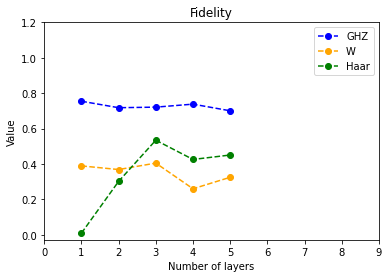

In [5]:
fidelitiesghz = []
fidelitiesw = []
fidelitieshaar = []
tracesghz = []
tracesw = []
traceshaar = []
import os
for dir in dirs:
    dir = str(dir)
    fidelities_ghz = pd.read_csv(path + dir + "/fidelities_ghz.csv", sep=",", header=None)
    fidelities_ghz = fidelities_ghz.applymap(lambda s: np.complex(s.replace('i', 'j'))).values
    fidelitiesghz.append(np.real(np.max(fidelities_ghz)))

    fidelities_w = pd.read_csv(path + dir + "/fidelities_w.csv", sep=",", header=None)
    fidelities_w = fidelities_w.applymap(lambda s: np.complex(s.replace('i', 'j'))).values
    
    fidelitiesw.append(np.real(np.max(fidelities_w)))

    if os.path.exists(path + dir + "/fidelities_haar.csv"):
        fidelities_haar = pd.read_csv(path + dir + "/fidelities_haar.csv", sep=",", header=None)
        fidelities_haar = fidelities_haar.applymap(lambda s: np.complex(s.replace('i', 'j'))).values
        fidelitieshaar.append(np.real(np.max(fidelities_haar)))

    traces_ghz = pd.read_csv(path + dir + "/traces_ghz.csv", sep=",", header=None).values
    tracesghz.append(np.min(traces_ghz))
    traces_w = pd.read_csv(path + dir + "/traces_w.csv", sep=",", header=None).values
    tracesw.append(np.min(traces_w))
    if os.path.exists(path + dir + "/fidelities_haar.csv"):
        traces_haar = pd.read_csv(path + dir + "/traces_haar.csv", sep=",", header=None).values
        traceshaar.append(np.min(traces_haar))


x = [1,2,3,4,5]
print(fidelitiesghz)
plt.plot(x, fidelitiesghz, marker='o', linestyle='--', color='blue', label = 'GHZ')
plt.plot(x, fidelitiesw, marker='o', linestyle='--', color='orange', label = 'W')
plt.plot(x, fidelitieshaar, marker='o', linestyle='--', color='green', label = 'Haar')
plt.title('Fidelity')
plt.xlabel('Number of layers')
plt.xticks(np.arange(min(x) - 1, max(x) + 5, 1))
plt.yticks(np.arange(0, 1.4, 0.2))
plt.ylabel('Value')
plt.legend()
# plt.savefig('Compare_num_layer_GHZ.png', format='png', dpi=600)
plt.show()

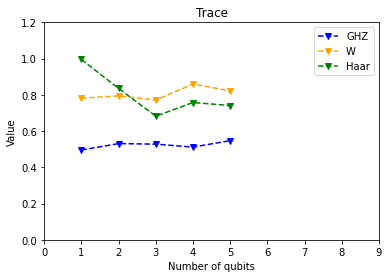

In [6]:
plt.plot(x, tracesghz, marker='v', linestyle='--', color='blue', label = 'GHZ')
plt.plot(x, tracesw, marker='v', linestyle='--', color='orange', label = 'W')
plt.plot(x, traceshaar, marker='v', linestyle='--', color='green', label = 'Haar')
plt.title('Trace')
plt.xlabel('Number of qubits')
plt.xticks(np.arange(min(x) - 1, max(x) + 5, 1))
plt.yticks(np.arange(0, 1.4, 0.2))
plt.ylabel('Value')
plt.legend()
# plt.savefig('Compare_init_state_trace_number_qubits.png', format='png', dpi=600)
plt.show()

C:\Users\haime\AppData\Local\Temp/ipykernel_13428/3691733279.py:11: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fidelities_ghz = fidelities_ghz.applymap(lambda s: np.complex(s.replace('i', 'j'))).values
C:\Users\haime\AppData\Local\Temp/ipykernel_13428/3691733279.py:15: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fid

[array([0.74678965]), array([0.74912771]), array([0.74873711]), array([0.74184393]), array([0.73812662])]


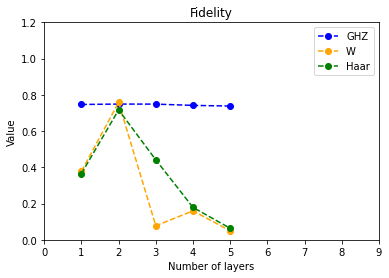

In [7]:
fidelitiesghz = []
fidelitiesw = []
fidelitieshaar = []
tracesghz = []
tracesw = []
traceshaar = []
import os
for dir in dirs:
    dir = str(dir)
    fidelities_ghz = pd.read_csv(path + dir + "/fidelities_ghz.csv", sep=",", header=None)
    fidelities_ghz = fidelities_ghz.applymap(lambda s: np.complex(s.replace('i', 'j'))).values
    fidelitiesghz.append(np.real(fidelities_ghz[-1]))

    fidelities_w = pd.read_csv(path + dir + "/fidelities_w.csv", sep=",", header=None)
    fidelities_w = fidelities_w.applymap(lambda s: np.complex(s.replace('i', 'j'))).values
    
    fidelitiesw.append(np.real(fidelities_w[-1]))

    if os.path.exists(path + dir + "/fidelities_haar.csv"):
        fidelities_haar = pd.read_csv(path + dir + "/fidelities_haar.csv", sep=",", header=None)
        fidelities_haar = fidelities_haar.applymap(lambda s: np.complex(s.replace('i', 'j'))).values
        fidelitieshaar.append(np.real(fidelities_haar[-1]))

    traces_ghz = pd.read_csv(path + dir + "/traces_ghz.csv", sep=",", header=None).values
    tracesghz.append(traces_ghz[-1])
    traces_w = pd.read_csv(path + dir + "/traces_w.csv", sep=",", header=None).values
    tracesw.append(traces_w[-1])
    if os.path.exists(path + dir + "/fidelities_haar.csv"):
        traces_haar = pd.read_csv(path + dir + "/traces_haar.csv", sep=",", header=None).values
        traceshaar.append(traces_haar[-1])


x = [1,2,3,4,5]
print(fidelitiesghz)
plt.plot(x, fidelitiesghz, marker='o', linestyle='--', color='blue', label = 'GHZ')
plt.plot(x, fidelitiesw, marker='o', linestyle='--', color='orange', label = 'W')
plt.plot(x, fidelitieshaar, marker='o', linestyle='--', color='green', label = 'Haar')
plt.title('Fidelity')
plt.xlabel('Number of layers')
plt.xticks(np.arange(min(x) - 1, max(x) + 5, 1))
plt.yticks(np.arange(0, 1.4, 0.2))
plt.ylabel('Value')
plt.legend()
# plt.savefig('Compare_num_layer_GHZ.png', format='png', dpi=600)
plt.show()

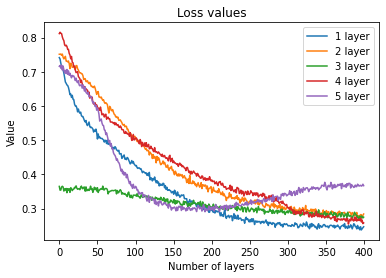

In [7]:
import os
for dir in dirs:
    dir = str(dir)
    
    loss_values_w = pd.read_csv(path + dir + "/loss_values_ghz.csv", sep=",", header=None)
    #loss_values_haar = fidelities_haar.applymap(lambda s: np.complex(s.replace('i', 'j'))).values
    plt.plot(loss_values_w, label = dir + ' layer')

   
x = [1,2,3,4,5]

plt.title('Loss values')
plt.xlabel('Number of layers')
#plt.xticks(np.arange(min(x) - 1, max(x) + 5, 1))
#plt.yticks(np.arange(0, 1.4, 0.2))
plt.ylabel('Value')
plt.legend()
#plt.savefig('Compare_num_layer_GHZ.png', format='png', dpi=600)
plt.show()

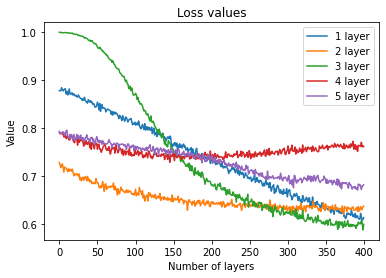

In [8]:
import os
for dir in dirs:
    dir = str(dir)
    
    loss_values_w = pd.read_csv(path + dir + "/loss_values_w.csv", sep=",", header=None)
    #loss_values_haar = fidelities_haar.applymap(lambda s: np.complex(s.replace('i', 'j'))).values
    plt.plot(loss_values_w, label = dir + ' layer')

   
x = [1,2,3,4,5]

plt.title('Loss values')
plt.xlabel('Number of layers')
#plt.xticks(np.arange(min(x) - 1, max(x) + 5, 1))
#plt.yticks(np.arange(0, 1.4, 0.2))
plt.ylabel('Value')
plt.legend()
#plt.savefig('Compare_num_layer_GHZ.png', format='png', dpi=600)
plt.show()